# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Empty lists for all the data that needs to be found
city_name = []
country = []
date = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind = []

# For loop starting points
record = 1
set = 1

print("Beginning Data Retrieval")
print("------------------------------")

# For loop for cities in the list
for x, city in enumerate(cities):
    if (x % 50 == 0 and x >= 50):
        record = 0
        set +=1
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        print_city = response["name"]
        
        print("Processing Record %s of Set %s | %s" % (record, set, print_city))
        
        record = record + 1
        time.sleep(1.00)

    except:
        print("City not found. Skipping ...")
    continue

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | Bauchi
Processing Record 2 of Set 1 | Mahébourg
Processing Record 3 of Set 1 | Elmira
Processing Record 4 of Set 1 | Hobart
Processing Record 5 of Set 1 | Sobolevo
Processing Record 6 of Set 1 | Kaitangata
Processing Record 7 of Set 1 | Castro
Processing Record 8 of Set 1 | Asău
Processing Record 9 of Set 1 | Hermanus
Processing Record 10 of Set 1 | Bredasdorp
Processing Record 11 of Set 1 | Mayo
City not found. Skipping ...
Processing Record 12 of Set 1 | Bocas del Toro
Processing Record 13 of Set 1 | Tiksi
Processing Record 14 of Set 1 | New Norfolk
Processing Record 15 of Set 1 | Tuktoyaktuk
Processing Record 16 of Set 1 | Kimberley
Processing Record 17 of Set 1 | Thompson
Processing Record 18 of Set 1 | Geraldton
Processing Record 19 of Set 1 | Jamestown
Processing Record 20 of Set 1 | Kapoeta
Processing Record 21 of Set 1 | Provideniya
City not found. Skipping ...
Processing Record 22 of Set 1 |

Processing Record 4 of Set 5 | Nome
Processing Record 5 of Set 5 | Durusu
Processing Record 6 of Set 5 | Domoni
Processing Record 7 of Set 5 | Leningradskiy
Processing Record 8 of Set 5 | Arroio Grande
Processing Record 9 of Set 5 | Tasiilaq
Processing Record 10 of Set 5 | Novikovo
Processing Record 11 of Set 5 | Zaysan
Processing Record 12 of Set 5 | Esim
City not found. Skipping ...
Processing Record 13 of Set 5 | Zambezi
Processing Record 14 of Set 5 | College
Processing Record 15 of Set 5 | Priiskovyy
Processing Record 16 of Set 5 | Eucaliptus
Processing Record 17 of Set 5 | Port-Gentil
Processing Record 18 of Set 5 | Sandwick
Processing Record 19 of Set 5 | Erzin
Processing Record 20 of Set 5 | Vardø
City not found. Skipping ...
Processing Record 21 of Set 5 | Mar del Plata
Processing Record 22 of Set 5 | General Pico
Processing Record 23 of Set 5 | Santa Maria
Processing Record 24 of Set 5 | Butaritari
Processing Record 25 of Set 5 | Bethel
Processing Record 26 of Set 5 | Dali
Pr

Processing Record 4 of Set 9 | Krasnovishersk
Processing Record 5 of Set 9 | Lipin Bor
Processing Record 6 of Set 9 | Tiruvannamalai
Processing Record 7 of Set 9 | Port Hardy
Processing Record 8 of Set 9 | Ayagoz
Processing Record 9 of Set 9 | Port Lincoln
City not found. Skipping ...
Processing Record 10 of Set 9 | Yerbogachën
Processing Record 11 of Set 9 | Deputatsky
Processing Record 12 of Set 9 | Abhā
Processing Record 13 of Set 9 | Buin
Processing Record 14 of Set 9 | Labuhan
Processing Record 15 of Set 9 | Saint Paul Harbor
Processing Record 16 of Set 9 | Visby
City not found. Skipping ...
Processing Record 17 of Set 9 | Susaki
Processing Record 18 of Set 9 | Tabou
Processing Record 19 of Set 9 | Richards Bay
Processing Record 20 of Set 9 | Chicama
Processing Record 21 of Set 9 | Thul
Processing Record 22 of Set 9 | Torit
Processing Record 23 of Set 9 | Kyren
Processing Record 24 of Set 9 | Sankheda
Processing Record 25 of Set 9 | Kedrovyy
Processing Record 26 of Set 9 | Xingyi


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = {"City" : city_name,
              "Lat" : lat,
              "Lng" : lng,
              "Max Temp" : max_temp,
              "Humidity" : humidity,
              "Cloudiness" : cloudiness,
              "Wind Speed" : wind,
              "Country" : country,
              "Date" : date}
weather_df = pd.DataFrame(weather_df)
weather_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bauchi,10.50,10.00,72.97,88,96,3.18,NG,1597791092
1,Mahébourg,-20.41,57.70,71.60,73,40,14.99,MU,1597791093
2,Elmira,42.09,-76.81,75.20,38,40,4.70,US,1597791094
3,Hobart,-42.88,147.33,44.01,87,75,9.17,AU,1597790825
4,Sobolevo,54.43,31.90,59.32,82,99,8.39,RU,1597791097


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,19.944424,18.166457,66.636853,72.681655,51.289568,7.809532,1.597791e+09
std,33.931325,87.692264,14.390937,20.044484,38.623486,5.864766,1.985478e+02
min,-54.800000,-175.200000,27.820000,9.000000,0.000000,0.310000,1.597791e+09
25%,-8.862500,-58.672500,54.405000,62.000000,8.000000,3.360000,1.597791e+09
50%,22.440000,24.755000,68.025000,77.000000,57.500000,6.930000,1.597791e+09
75%,49.590000,89.975000,77.712500,88.000000,90.000000,10.290000,1.597792e+09
max,78.220000,179.320000,111.000000,100.000000,100.000000,61.070000,1.597792e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

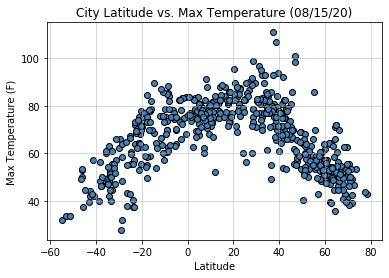

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor="steelblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (08/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-',linewidth=1,alpha = 0.5)
plt.savefig("output_data/City Latitude vs Max Temp.png")

This code is analyzing the effect that latitude has on the max temperature in a city and it looks like latitude has an effect on max temperatures.

## Latitude vs. Humidity Plot

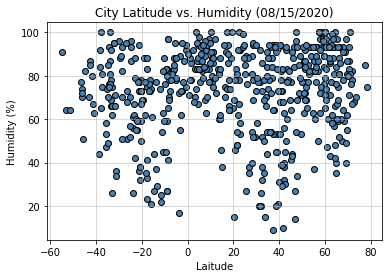

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor="steelblue", edgecolor="black")
plt.title("City Latitude vs. Humidity (08/15/2020)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-',linewidth=1,alpha = 0.5)
plt.savefig("output_data/City Latitude vs Humidity.png")

This code is analyzing the effect that latitude has on the humidity in a city and based on the graph it looks like that latitude might have a slight effect on humidity.

## Latitude vs. Cloudiness Plot

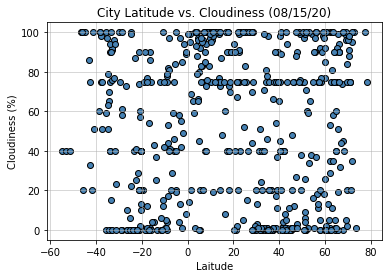

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor="steelblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (08/15/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-',linewidth=1,alpha = 0.5)
plt.savefig("output_data/City Latitude vs Cloudiness.png")

This code is analyzing the effect that latitude has on the cloudiness in a city and based on the graph it looks as if the latitude has no effect on the cloudiness.

## Latitude vs. Wind Speed Plot

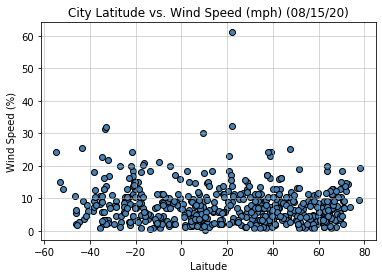

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor="steelblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (mph) (08/15/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.grid(linestyle='-',linewidth=1,alpha = 0.5)
plt.savefig("output_data/City Latitude vs Wind Speed.png")

This code is analyzing the effect that latitude has on the wind speed in a city and based on the graph it looks as if the latitude has no effect on the wind speed.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df["Lat"] >= 0]
southern = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49132928436900536


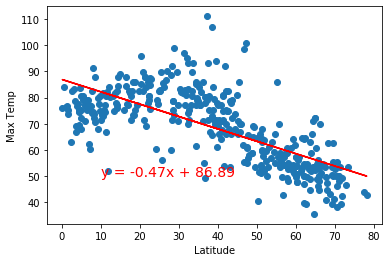

In [16]:
x = northern["Lat"]
y = northern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
linear_reg = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y)
plt.plot(x, linear_reg, "r-")
plt.annotate(line_eq, (10, 50), fontsize = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

This linear regression shows that there is a pretty good correlation between the two data sets. Meaning that the latitude has a pretty good effect on max temperatures in a city.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5753758496584407


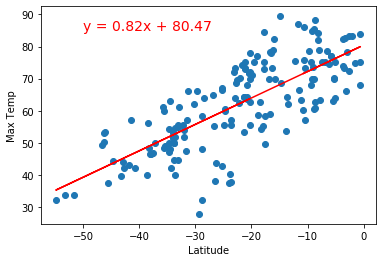

In [17]:
x = southern["Lat"]
y = southern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
linear_reg = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y)
plt.plot(x, linear_reg, "r-")
plt.annotate(line_eq, (-50, 85), fontsize = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

This linear regression shows that there is a pretty good correlation between the two data sets. Meaning that the latitude has a pretty good effect on max temperatures in a city.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0036067983410416906


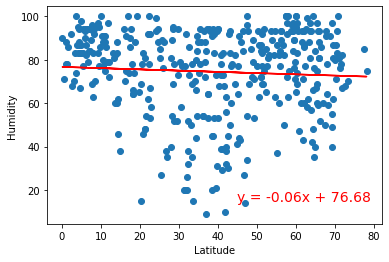

In [18]:
x = northern["Lat"]
y = northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
linear_reg = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y)
plt.plot(x, linear_reg, "r-")
plt.annotate(line_eq, (45, 15), fontsize = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

This linear regression shows that there is almost no correlation between the two data sets. Meaning that the latitude has no effect on the humidity of a city.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0035933597463250347


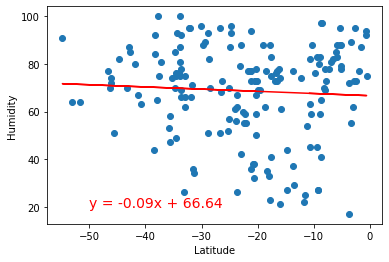

In [19]:
x = southern["Lat"]
y = southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
linear_reg = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y)
plt.plot(x, linear_reg, "r-")
plt.annotate(line_eq, (-50, 20), fontsize = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

This linear regression shows that there is almost no correlation between the two data sets. Meaning that the latitude has no effect on the humidity of a city.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02723754395632386


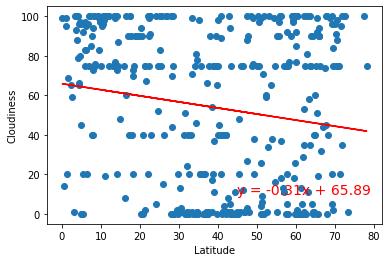

In [20]:
x = northern["Lat"]
y = northern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
linear_reg = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y)
plt.plot(x, linear_reg, "r-")
plt.annotate(line_eq, (45, 10), fontsize = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

This linear regression shows that there is almost no correlation between the two data sets. Meaning that the latitude has no effect on the cloudiness of a city.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04201122319604891


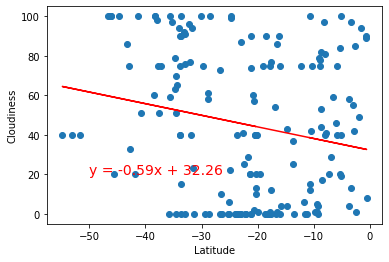

In [21]:
x = southern["Lat"]
y = southern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
linear_reg = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y)
plt.plot(x, linear_reg, "r-")
plt.annotate(line_eq, (-50, 20), fontsize = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

This linear regression shows that there is almost no correlation between the two data sets. Meaning that the latitude has no effect on the cloudiness of a city.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0005419158523144783


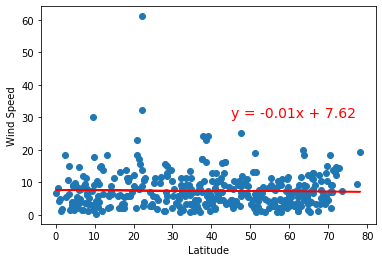

In [22]:
x = northern["Lat"]
y = northern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
linear_reg = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y)
plt.plot(x, linear_reg, "r-")
plt.annotate(line_eq, (45, 30), fontsize = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

This linear regression shows that there is almost no correlation between the two data sets. Meaning that the latitude has no effect on the wind speed of a city.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.020084320519409452


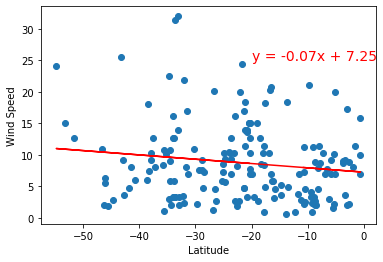

In [23]:
x = southern["Lat"]
y = southern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
linear_reg = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y)
plt.plot(x, linear_reg, "r-")
plt.annotate(line_eq, (-20, 25), fontsize = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

This linear regression shows that there is almost no correlation between the two data sets. Meaning that the latitude has no effect on the wind speed of a city.